# Task 3

## General instructions

First, update the following cell to have a link to your Homework 1 GitHub repository

**UPDATE THIS LINK**

https://github.com/a-ramji/eds220-hwk-2

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Acknowledgments

This exercise is based on this [NCEAS Learning Hub R lesson](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).

Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.

## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed here at KNB:

 [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886- 1997). Gulf of Alaska Data Portal. df35b.304.2.](https://knb.ecoinformatics.org/view/df35b.304.2)

The dataset is in csv format and has the following columns:

- Region: region code
- Year: year fish were caught
- notesRegCode: notes and comments
- Species: species of salmon caught
- Catch: commercial catches of salmon species (in tousands of fish)


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

<AxesSubplot:title={'center':'Average Salmon Catch by Region 1878-1997'}, xlabel='Region', ylabel='Catch (in thousands of fish)'>

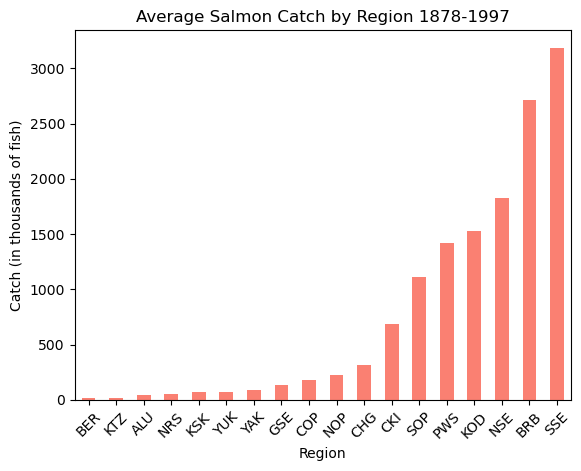

In [1]:
# importing pandas with standard abbreviation
import pandas as pd

# reading in data from within our working directory
catch_original = pd.read_csv('salmon_data.csv')

# getting rid of notes column
catch_original = catch_original.drop(columns = 'notesRegCode')

# fixing the problematic value in row index 400
catch_original.at[400, 'Catch'] = 1

# setting the datatype of catch to integer because it was an object before
catch_original.Catch = catch_original.Catch.astype('int64')

# creating a dataframe with the average catch per region using groupby() and mean()
avg_catch_df = catch_original.groupby('Region').Catch.mean()




# creating and customizing a bar plot of our average catch data by region
avg_catch_df.sort_values().plot(kind = 'bar', # specifying bar chart
                                rot=45, # rotating x-axis labels to make it more legible 
                                title="Average Salmon Catch by Region 1878-1997", 
                                xlabel="Region",
                                ylabel="Catch (in thousands of fish)", # the metadata says that the catch unit is in thousands of fish

                                color = 'salmon'
                               )

## 1

Import the data from the `salmon_data.csv` as `catch_original` and look at the head of the dataframe.

In [16]:
# importing pandas with standard abbreviation
import pandas as pd

# reading in data from within our working directory
catch_original = pd.read_csv('salmon_data.csv')



## 2
In the next cell:
1. Print the unique values of the `notesRegCode` column. 
2. Update the dataframe so it doesn't have the `notesRegCode` column.
3. Verify the column is no longer in the dataframe.

In [17]:
# printing array of unique values in notesRegCode column
print(catch_original.notesRegCode.unique())

# getting rid of notes column
catch_original = catch_original.drop(columns = 'notesRegCode')

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

In [4]:
# checking to make sure we dropped the column
catch_original.columns

Index(['Region', 'Year', 'Species', 'Catch'], dtype='object')

## 3
In the next cell, check the data types of the columns. Does each column have the expected data type? Write your answer as a short comment in the same cell.


In [5]:
catch_original.dtypes

# I would have expected the 'catch' column to be an integer (int64) data type
# I think 'year', which is int64, should be a datetime object if we are 
# treating it as a date value, rather than a generic integer.

Region     object
Year        int64
Species    object
Catch      object
dtype: object

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`.

Run the next cell and read the end of the error message closely.

In [6]:
# to use `astype` we select a specifc column
#  and then indicate the dtype we want to convert to
#  astype does not modify the column in place
# catch_original.Catch.astype('int64')

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out this data set is from a PDF which was automatically converted into a csv and this value of 'I' is actually a 1.

In the next cell find the row(s) that is causing this issue. 

In [18]:
# finding which row is causing the issue
catch_original[catch_original.Catch=='I']

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1. HINT: you could use the `at` method to access a single value in the dataframe.
2. Access the row you updated to verify the value was changed.

In [8]:
# fixing the problematic value in row index 400

catch_original.at[400, 'Catch'] = 1

# accessing the row and column to make sure the value was changed
catch_original.Catch[400]

# another way to view the full row
catch_original.iloc[400, ]

Region         GSE
Year          1955
Species    Chinook
Catch            1
Name: 400, dtype: object

## 7
In the next cell:

1. Update the Catch column in `catch_data` to be of type `int64`.
2. Check the dtypes of the columns.

In [9]:
catch_original.Catch = catch_original.Catch.astype('int64')
catch_original.dtypes

Region     object
Year        int64
Species    object
Catch       int64
dtype: object

## 8
Create a dataframe with the average catch per region. HINT: use `groupby()`. Store your dataframe in new variable.


In [10]:
# creating a dataframe with the average catch per region using groupby() and mean()
avg_catch_df = catch_original.groupby('Region').Catch.mean()
avg_catch_df

Region
ALU      40.383908
BER      16.372549
BRB    2709.796491
CHG     315.487273
CKI     683.571429
COP     179.223404
GSE     133.841463
KOD    1528.350000
KSK      67.642353
KTZ      18.836145
NOP     229.493478
NRS      51.502703
NSE    1825.020870
PWS    1419.236697
SOP    1110.942222
SSE    3184.660714
YAK      91.922917
YUK      68.645570
Name: Catch, dtype: float64

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<AxesSubplot:title={'center':'Average Salmon Catch by Region 1878-1997'}, xlabel='Region', ylabel='Catch (in thousands of fish)'>

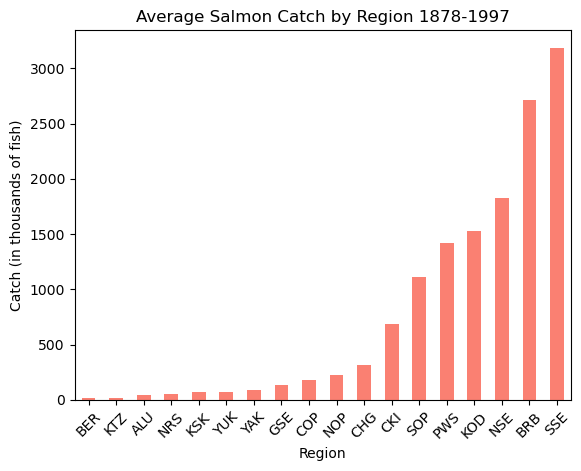

In [11]:
# creating and customizing a bar plot of our average catch data by region
avg_catch_df.sort_values().plot(kind = 'bar', # specifying bar chart
                                rot=45, # rotating x-axis labels to make it more legible 
                                title="Average Salmon Catch by Region 1878-1997", 
                                xlabel="Region",
                                ylabel="Catch (in thousands of fish)", # the metadata says that the catch unit is in thousands of fish

                                color = 'salmon'
                               )

## 10

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.